### Part 1- Data Preprocessing

In [1]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# importing the training set
train_set=pd.read_csv('Google_Stock_Price_Train.csv')
train_set

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [3]:
train_set=train_set.iloc[:,1:2].values
train_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [4]:
# Feature scaling
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
train_set=sc.fit_transform(train_set)
train_set


array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [5]:
train_set.shape

(1258, 1)

In [6]:
# Getting the input and the output
X_train=train_set[0:1257]#input at time Tl
y_train=train_set[1:1258]#output at time T+1

In [7]:
# Reshaping
X_train=np.reshape(X_train,(1257,1,1))
# 1257:no of observation
# 1:time step T+1-T=1
# 1:no of input features
X_train.shape

(1257, 1, 1)

### Part 2-Building the RNN

In [8]:
# import libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.


In [17]:
# initialising the RNN
regressor=Sequential()

# adding the input layer and the LSTM layer
regressor.add(LSTM(units=4,activation='sigmoid',input_shape=(X_train.shape[1],1)))
# X_train.shape[1]=1:time step
# 1:no of feature

# Adding the output layer
regressor.add(Dense(units=1))
# units=no of neurons in output layer
# output is stock price at T+1 and dimension of the output at time T+1 is 1

# Compiling the RNN
regressor.compile(optimizer='adam',loss='mean_squared_error')

# Fitting the RNN to the train_set
regressor.fit(X_train,y_train,batch_size=8,epochs=400)

Epoch 1/400
1257/1257 [==============================] - 1s 735us/step - loss: 0.1083
Epoch 2/400
1257/1257 [==============================] - 0s 205us/step - loss: 0.0778
Epoch 3/400
1257/1257 [==============================] - 0s 206us/step - loss: 0.0715
Epoch 4/400
1257/1257 [==============================] - 0s 206us/step - loss: 0.0650
Epoch 5/400
1257/1257 [==============================] - 0s 217us/step - loss: 0.0585
Epoch 6/400
1257/1257 [==============================] - 0s 219us/step - loss: 0.0519
Epoch 7/400
1257/1257 [==============================] - 0s 242us/step - loss: 0.0451
Epoch 8/400
1257/1257 [==============================] - 0s 269us/step - loss: 0.0385
Epoch 9/400
1257/1257 [==============================] - 0s 275us/step - loss: 0.0319
Epoch 10/400
1257/1257 [==============================] - 0s 275us/step - loss: 0.0259
Epoch 11/400
1257/1257 [==============================] - 0s 318us/step - loss: 0.0200
Epoch 12/400
1257/1257 [============================

1257/1257 [==============================] - 1s 619us/step - loss: 2.6136e-04
Epoch 92/400
1257/1257 [==============================] - 1s 974us/step - loss: 2.6060e-04
Epoch 93/400
1257/1257 [==============================] - 1s 977us/step - loss: 2.6042e-04
Epoch 94/400
1257/1257 [==============================] - 1s 978us/step - loss: 2.5826e-04
Epoch 95/400
1257/1257 [==============================] - 1s 994us/step - loss: 2.5596e-04
Epoch 96/400
1257/1257 [==============================] - 1s 974us/step - loss: 2.6043e-04
Epoch 97/400
1257/1257 [==============================] - 1s 976us/step - loss: 2.6121e-04
Epoch 98/400
1257/1257 [==============================] - 1s 987us/step - loss: 2.5856e-04
Epoch 99/400
1257/1257 [==============================] - 1s 989us/step - loss: 2.5444e-04
Epoch 100/400
1257/1257 [==============================] - 1s 886us/step - loss: 2.5625e-04
Epoch 101/400
1257/1257 [==============================] - 1s 567us/step - loss: 2.6006e-04
Epoch 102/

1257/1257 [==============================] - 0s 229us/step - loss: 2.6484e-04
Epoch 181/400
1257/1257 [==============================] - 0s 227us/step - loss: 2.6378e-04
Epoch 182/400
1257/1257 [==============================] - 0s 225us/step - loss: 2.5820e-04
Epoch 183/400
1257/1257 [==============================] - 0s 226us/step - loss: 2.5603e-04
Epoch 184/400
1257/1257 [==============================] - 0s 227us/step - loss: 2.6460e-04
Epoch 185/400
1257/1257 [==============================] - 0s 226us/step - loss: 2.5629e-04
Epoch 186/400
1257/1257 [==============================] - 0s 229us/step - loss: 2.5507e-04
Epoch 187/400
1257/1257 [==============================] - 0s 229us/step - loss: 2.5984e-04
Epoch 188/400
1257/1257 [==============================] - 0s 225us/step - loss: 2.5970e-04
Epoch 189/400
1257/1257 [==============================] - 0s 223us/step - loss: 2.6455e-04
Epoch 190/400
1257/1257 [==============================] - 0s 229us/step - loss: 2.5672e-04
Ep

1257/1257 [==============================] - 0s 240us/step - loss: 2.5413e-04
Epoch 270/400
1257/1257 [==============================] - 0s 243us/step - loss: 2.6144e-04
Epoch 271/400
1257/1257 [==============================] - 0s 242us/step - loss: 2.5928e-04
Epoch 272/400
1257/1257 [==============================] - 0s 239us/step - loss: 2.5557e-04
Epoch 273/400
1257/1257 [==============================] - 0s 242us/step - loss: 2.5639e-04
Epoch 274/400
1257/1257 [==============================] - 0s 242us/step - loss: 2.6082e-04
Epoch 275/400
1257/1257 [==============================] - 0s 241us/step - loss: 2.5891e-04
Epoch 276/400
1257/1257 [==============================] - 0s 239us/step - loss: 2.5382e-04
Epoch 277/400
1257/1257 [==============================] - 0s 242us/step - loss: 2.5142e-04
Epoch 278/400
1257/1257 [==============================] - 0s 242us/step - loss: 2.6007e-04
Epoch 279/400
1257/1257 [==============================] - 0s 239us/step - loss: 2.5696e-04
Ep

1257/1257 [==============================] - 0s 244us/step - loss: 2.5606e-04
Epoch 359/400
1257/1257 [==============================] - 0s 244us/step - loss: 2.5714e-04
Epoch 360/400
1257/1257 [==============================] - 0s 244us/step - loss: 2.5568e-04
Epoch 361/400
1257/1257 [==============================] - 0s 244us/step - loss: 2.5999e-04
Epoch 362/400
1257/1257 [==============================] - 0s 248us/step - loss: 2.6010e-04
Epoch 363/400
1257/1257 [==============================] - 0s 244us/step - loss: 2.5335e-04
Epoch 364/400
1257/1257 [==============================] - 0s 243us/step - loss: 2.5209e-04
Epoch 365/400
1257/1257 [==============================] - 0s 244us/step - loss: 2.5368e-04
Epoch 366/400
1257/1257 [==============================] - 0s 242us/step - loss: 2.5965e-04
Epoch 367/400
1257/1257 [==============================] - 0s 243us/step - loss: 2.5809e-04
Epoch 368/400
1257/1257 [==============================] - 0s 243us/step - loss: 2.5638e-04
Ep

### Part 3-Making the Prediction and visualizing the results

In [18]:
# Getting the real stock price of 2017
test_set=pd.read_csv('Google_Stock_Price_Test.csv')
# test_set
real_stock_price=test_set.iloc[:,1:2]
real_stock_price.head()

,Open
0,778.81
1,788.36
2,786.08
3,795.26
4,806.40


In [19]:
# Getting the predicted stock price of 2017
inputs=real_stock_price
inputs=sc.transform(inputs)
inputs=np.reshape(inputs,(20,1,1))
predicted_stock_price=regressor.predict(inputs)
predicted_stock_price

array([[0.92755   ],
       [0.9439644 ],
       [0.9400573 ],
       [0.95574415],
       [0.9746167 ],
       [0.97707665],
       [0.97225505],
       [0.9758639 ],
       [0.9764368 ],
       [0.97576284],
       [0.9736218 ],
       [0.9724576 ],
       [0.97547656],
       [0.97604924],
       [1.0012332 ],
       [1.0133563 ],
       [1.026821  ],
       [1.021737  ],
       [0.9884917 ],
       [0.9584658 ]], dtype=float32)

In [20]:
predicted_stock_price=sc.inverse_transform(predicted_stock_price)
predicted_stock_price

array([[777.73376],
       [786.5575 ],
       [784.45715],
       [792.8898 ],
       [803.035  ],
       [804.3573 ],
       [801.76544],
       [803.7054 ],
       [804.01337],
       [803.65106],
       [802.5001 ],
       [801.8743 ],
       [803.4972 ],
       [803.80505],
       [817.3429 ],
       [823.8598 ],
       [831.0979 ],
       [828.3649 ],
       [810.4936 ],
       [794.35284]], dtype=float32)

### Part 4- Visualizing the result

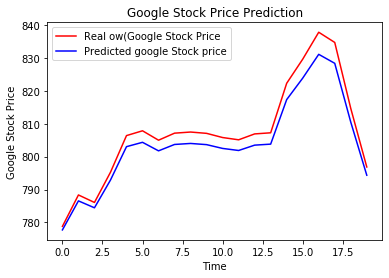

In [21]:
plt.plot(real_stock_price,color='red',label='Real ow(Google Stock Price')
plt.plot(predicted_stock_price,color='blue',label='Predicted google Stock price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

### Discussion:
  > We trained our model on time 't' as input data and data at 't+1' as output data.So it has time stamp of only 1.Because of this we can predict the stock price of only the next day by giving the input of current day(can predict stock price of monday by giving input of sunday).We can't predict the stock price of more than one days like predicting stock price of next 60 days

### Homework:
>* getting the real stock price of 2012-2016
>* getting the predicted stock price of 2012-2016
>* visualize the results


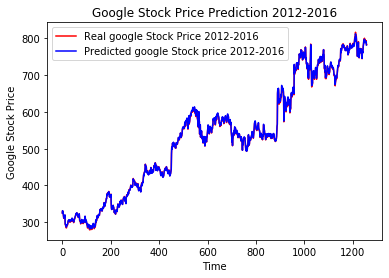

In [22]:
# getting the real stock price of 2012-2016
real_stock_12_16=pd.read_csv('Google_Stock_Price_Train.csv')
real_stock_12_16=real_stock_12_16.iloc[:,1:2].values

predicted_stock_12_16=regressor.predict(X_train)
predicted_stock_12_16=sc.inverse_transform(predicted_stock_12_16)
# predicted_stock_12_16

plt.plot(real_stock_12_16,color='red',label='Real google Stock Price 2012-2016')
plt.plot(predicted_stock_12_16,color='blue',label='Predicted google Stock price 2012-2016')
plt.title('Google Stock Price Prediction 2012-2016')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

### Part 5- Evaluating the RNN model

In [23]:
import math
from sklearn.metrics import mean_squared_error
rmse=math.sqrt(mean_squared_error(real_stock_price,predicted_stock_price))
rmse

3.8340559771437372

In [34]:
min=real_stock_price.min()
max=real_stock_price.max()
print('min=%d:max=%d' %(min,max))
avg=(min+max)/2
print('[INFO]Average=%d' %avg)

min=778:max=837
[INFO]Average=808


In [35]:
rmse/avg

Open    0.004743
dtype: float64